In [1]:
import rasterio
from rasterio.mask import mask
import matplotlib.pyplot as plt
%matplotlib inline
from rasterio.plot import show
from xml.dom import minidom
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
area = "Scott River Reach 9"

In [2]:
data =  pd.read_csv('stats.csv', parse_dates=True, index_col='Date')
stat =  pd.read_csv("scott.txt", sep="\t", comment='#', parse_dates=['datetime'])
stat.index = stat['datetime']
sdate = '2019-01-01'
edate = '2023-10-01'

## Open water fraction in time

The plot below compares the measured discharge at the closest discharge station with the fraction of detected open water. Discharge is plotted on a log scale given the relation between water depth (and river width) and discharge. 

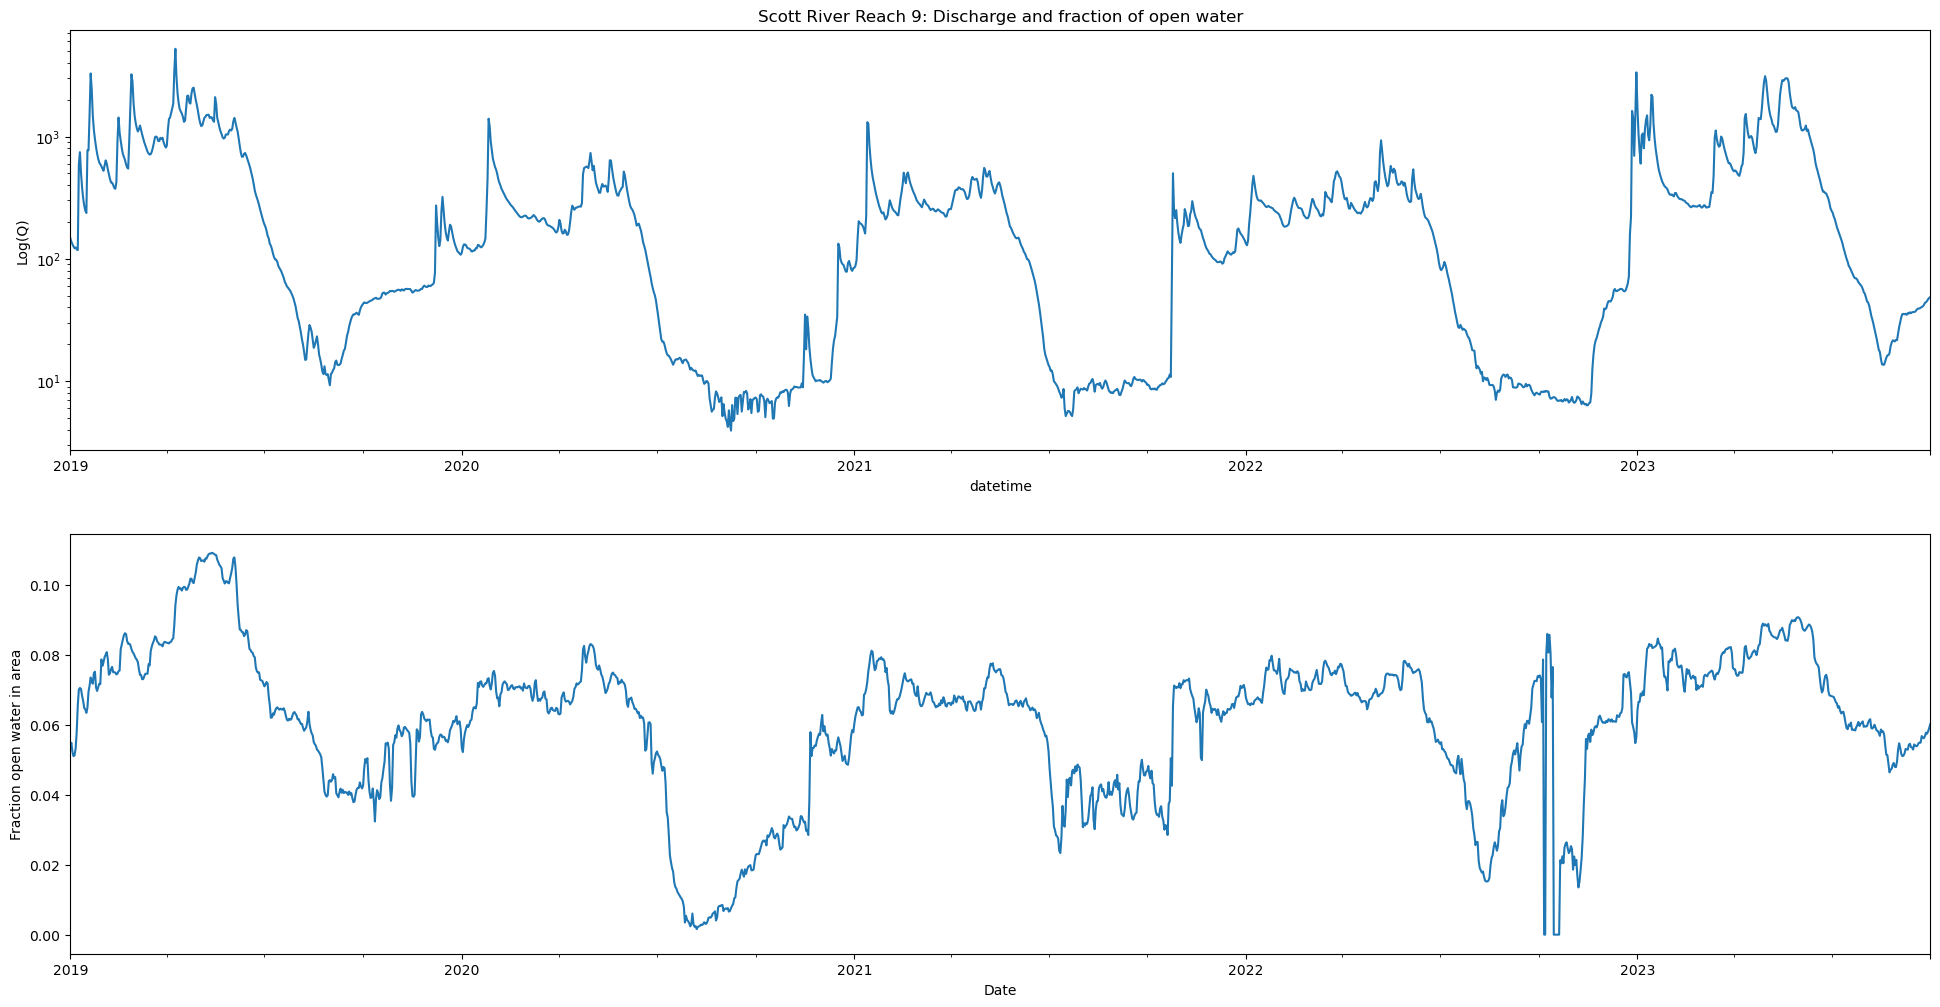

In [3]:
fig, ax= plt.subplots(2,1, figsize = (24,12))
stat['11850_00060_00003'][sdate:edate].plot(kind='line', logy=True, ax=ax[0])
ax[0].set_ylabel('Log(Q)')
ax[0].set_title(area + ': Discharge and fraction of open water')

data['water_frac_valid'][sdate:edate].plot(kind='line', ax= ax[1])
_ = ax[1].set_ylabel('Fraction open water in area')

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
idx = np.logical_and(~np.isnan(stat['11850_00060_00003'][sdate:edate].values), stat['11850_00060_00003'][sdate:edate].values >1)
x= np.log(stat['11850_00060_00003'][sdate:edate].values[idx].reshape(-1, 1))
y = data['water_frac_valid'][sdate:edate].values[idx].reshape(-1, 1)
model.fit(x, y)
sq = model.score(x,y)
yy = model.predict(x)

## Correlation

The plot below shows the correlation between the station data and the open water fraction. If there is a correlation this gives confidence that the time series covers the dynamics of the stretch of river. 


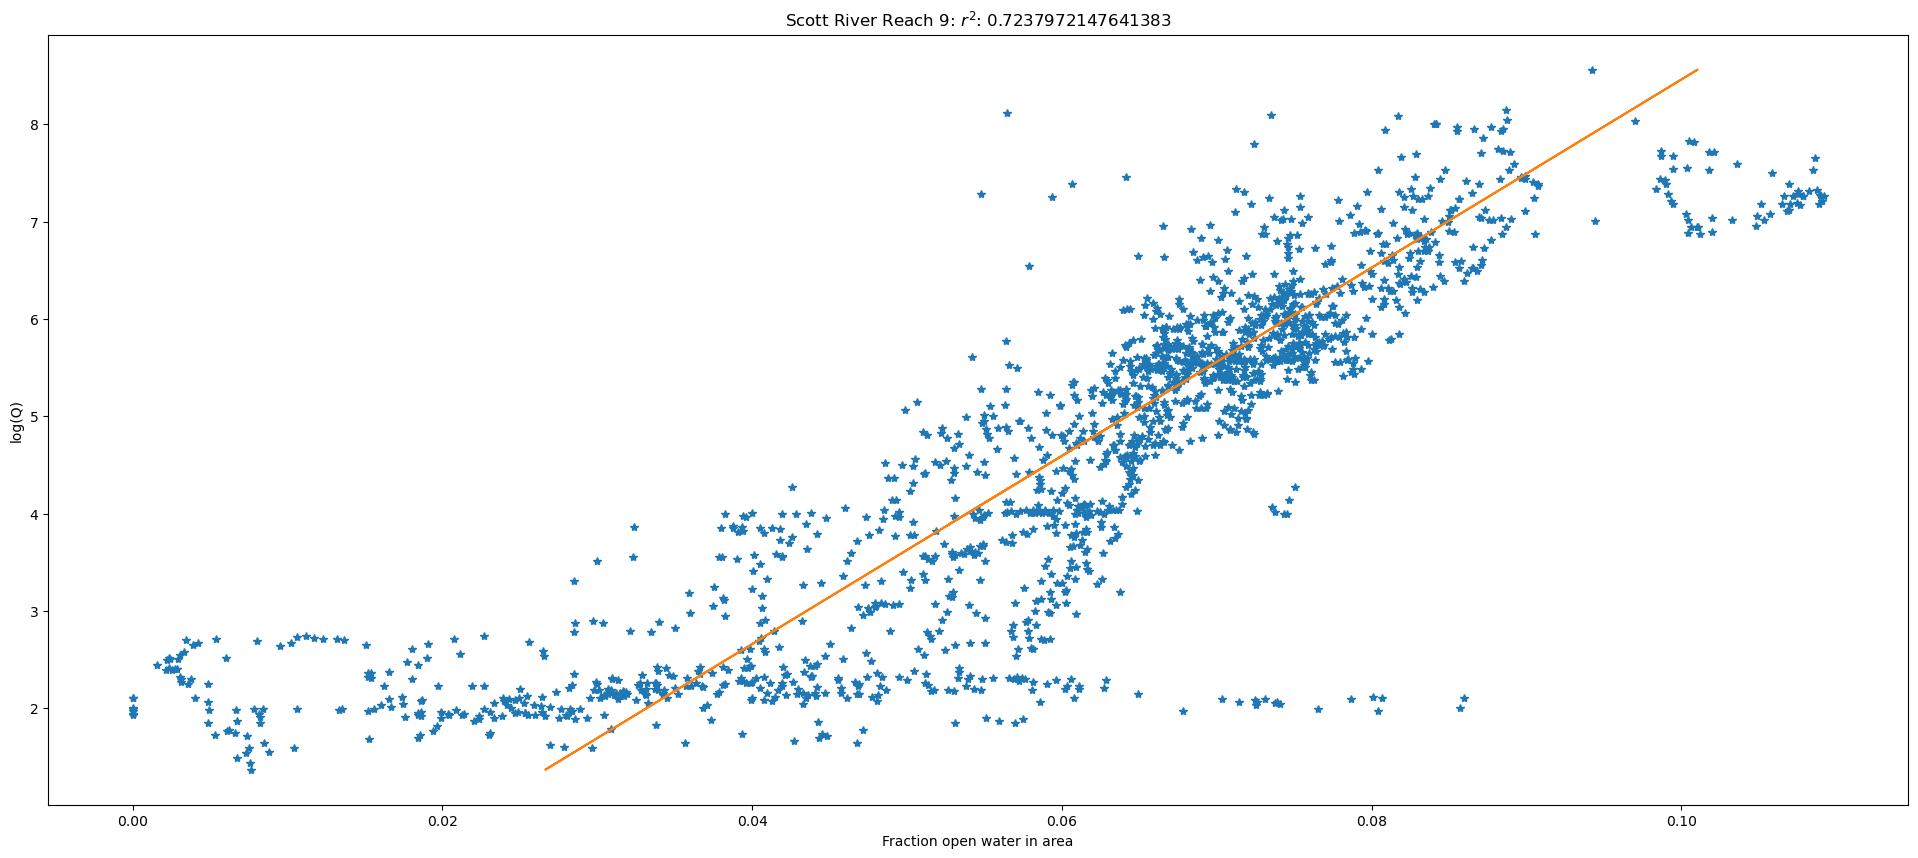

In [5]:
fig, ax= plt.subplots(1,1, figsize = (24,10))
plt.plot(data['water_frac_valid'][sdate:edate].values,  
         np.log(stat['11850_00060_00003'][sdate:edate].values),'*')

plt.ylabel('log(Q)')
plt.xlabel('Fraction open water in area')
ax.plot(yy, x)
_ = plt.title(area + ': $r^{2}$: ' + str(sq))

## Is the river dry? 

While we may be able to use the fraction of open water as a proxy to see if the rivers runs dry we could also look  into the connectivity of the river itself. A simple proxy for this can be the length of the largest detected open water futures in the area. Another method is to look at the difference in nir data inside and outside of the main channel.



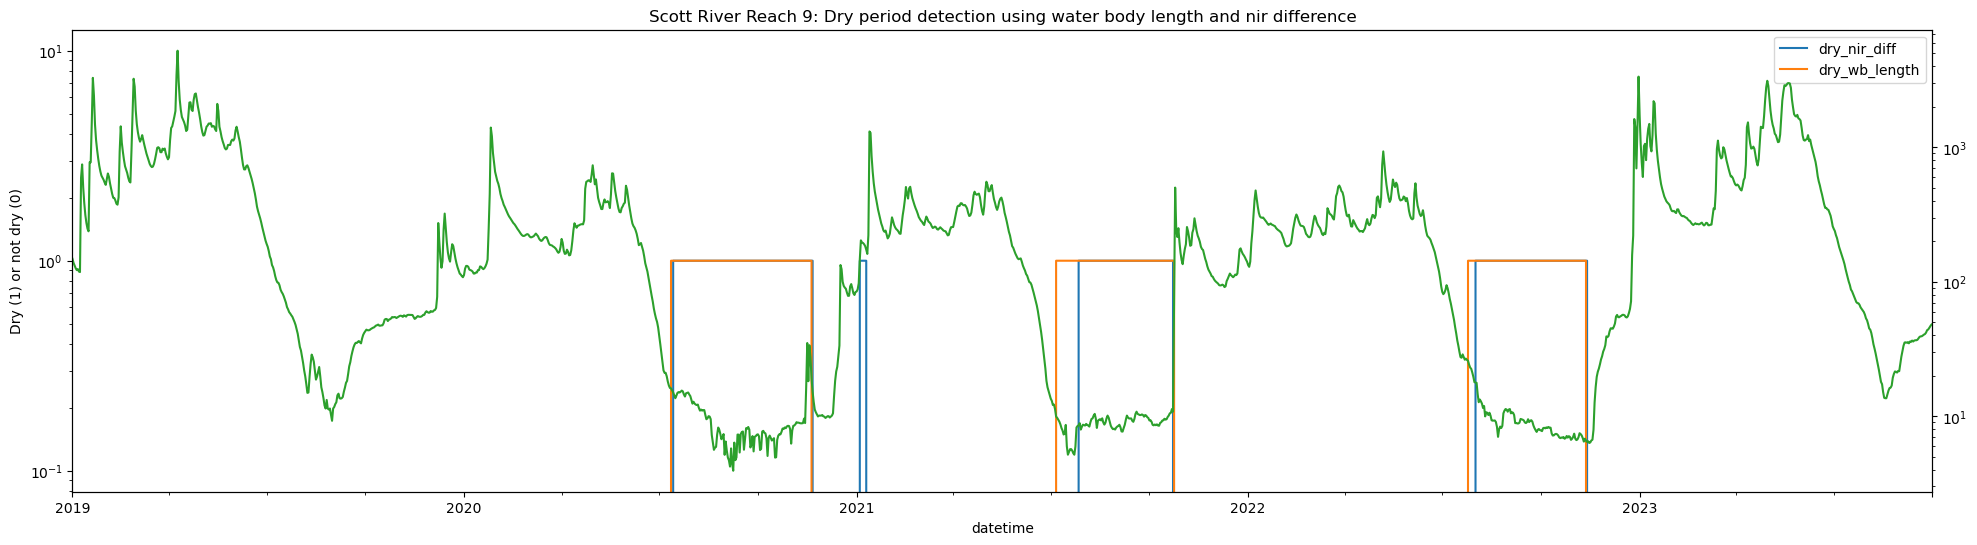

In [20]:
fig, ax= plt.subplots(1,1, figsize = (24,6))

data['dry_nir_diff'].astype(int).plot(ax=ax)
data['dry_wb_length'].astype(int).plot(ax=ax)
stat['11850_00060_00003'][sdate:edate].plot(kind='line', logy=True, ax=ax, secondary_y=True, label='Discharge')

ax.set_ylabel('Dry (1) or not dry (0)')
_ =ax.set_title(area + ': Dry period detection using water body length and nir difference') 
ax.legend()